In [7]:
# Import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the loan dataset to check it's consumer attributes, loan attributes and all the header columns
loan_dataset = pd.read_csv('C:/Users/Manee/OneDrive/Desktop/OnlyONE/Maneesh/UpGRAD/CaseStudy/loan/loan.csv', encoding = "ISO-8859-1")

loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
loan_dataset.shape

(39717, 111)

In [9]:
loan_dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# With above details we can see that there are some columns with all null values. So as the columns with null value will not help us in any kind of analysis, so we won't need those columns in our analysis. 

In [11]:
loan_dataset.dropna(axis = 1, how = 'all', inplace = True)

In [13]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# # With above result we can now see that out of resultant columns some of the columns have only one value for all the row items for example ''policy_code' column is having value '1' for all the rows. Similarly application_type column is having value 'individual' for all the rows. please refer to loan dataset for all the other such columns.
 => Now we can drop such columns as these won't be of much use.
 Columns which we are dropping now are as below.
 pymnt_plan
 collections_12_mths_ex_med
 policy_code
 application_type
 acc_now_delinq
 delinq_amnt
 pub_rec_bankruptcies
 tax_liens
 

In [14]:
loan_dataset.drop(['pymnt_plan','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens'], axis = 1, inplace = True)
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [15]:
missing = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.id)), 2)
missing[missing != 0]

emp_title                    6.19
emp_length                   2.71
desc                        32.58
title                        0.03
mths_since_last_delinq      64.66
mths_since_last_record      92.99
revol_util                   0.13
last_pymnt_d                 0.18
next_pymnt_d                97.13
last_credit_pull_d           0.01
chargeoff_within_12_mths     0.14
dtype: float64

In [ ]:
# After looking at the dataset with remaining columns, we can drop some more columns that won't be of much use in our analysis.
# For example, we can remove following columns
id
member_id
url
desc
emp_title
title
zip_code
addr_state
lets remove above columns as well


In [16]:
loan_dataset.drop(['id','member_id','url','desc','emp_title','title','zip_code','addr_state'], axis = 1, inplace = True)

In [18]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   term                      39717 non-null  object 
 4   int_rate                  39717 non-null  object 
 5   installment               39717 non-null  float64
 6   grade                     39717 non-null  object 
 7   sub_grade                 39717 non-null  object 
 8   emp_length                38642 non-null  object 
 9   home_ownership            39717 non-null  object 
 10  annual_inc                39717 non-null  float64
 11  verification_status       39717 non-null  object 
 12  issue_d                   39717 non-null  object 
 13  loan_status               39717 non-null  object 
 14  purpos

In [ ]:
# Now we are left with above 41 columns; lets further analyze which columns are important for our analysis to find out whose loan should be approved or not and who will default.
# As per data dictionary following 2 columns won't contribute in our analysis - 
# funded_amnt :
# value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
## funded_amnt_inv :
## value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

In [19]:
loan_dataset.drop(['funded_amnt','funded_amnt_inv'], axis = 1, inplace = True)

In [20]:
loan_dataset.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [22]:
loan_dataset.shape

(39717, 39)

In [ ]:
# Some Columns are not needed for loan pre-approval verfication for example below columns.
# Lets remove these column as well.
######################################
total_pymnt  -> COlumn is related to payment received till date
total_rec_prncp -> principal received till date
total_rec_int -> interest received till date
total_rec_late_fee -> Late fees received till date
recoveries --> total gross recovery
collection_recovery_fee - > Collection fee
mths_since_last_delinq --> the number of month since borrowers last recovery record
mths_since_last_record --> number of months since last public record

In [23]:
loan_dataset.drop(['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','mths_since_last_delinq','mths_since_last_record'], axis = 1, inplace = True)

In [24]:
loan_dataset.shape

(39717, 31)

In [25]:
loan_dataset.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,9,f,0.00,0.00,5833.84,Jan-15,171.62,NaN,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,4,f,0.00,0.00,1008.71,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,10,f,0.00,0.00,3005.67,Jun-14,649.91,NaN,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,37,f,0.00,0.00,12231.89,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,38,f,524.06,524.06,3513.33,May-16,67.79,Jun-16,May-16,0.0


In [27]:
# Now we are left with 31 columns
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   term                      39717 non-null  object 
 2   int_rate                  39717 non-null  object 
 3   installment               39717 non-null  float64
 4   grade                     39717 non-null  object 
 5   sub_grade                 39717 non-null  object 
 6   emp_length                38642 non-null  object 
 7   home_ownership            39717 non-null  object 
 8   annual_inc                39717 non-null  float64
 9   verification_status       39717 non-null  object 
 10  issue_d                   39717 non-null  object 
 11  loan_status               39717 non-null  object 
 12  purpose                   39717 non-null  object 
 13  dti                       39717 non-null  float64
 14  delinq

#  Lets create a new CSV with these 31 columns file that we will further utilise for our analysis

In [28]:
loan_dataset.to_csv('C:/Users/Manee/OneDrive/Desktop/OnlyONE/Maneesh/UpGRAD/CaseStudy/loan/rewritten_loan.csv', encoding='utf-8', index=False)

# Analyzing loan status

In [30]:
# Now we will categorize on the basis of loan status
loan = pd.read_csv('C:/Users/Manee/OneDrive/Desktop/OnlyONE/Maneesh/UpGRAD/CaseStudy/loan/rewritten_loan.csv', encoding = "ISO-8859-1")
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [34]:
# Our focus would mainly be on applicants with loan status full paid and charged off, so lets drop the ones with 
# loan status 'Current'
loan = loan[loan.loan_status != "Current"]
loan.shape

(38577, 31)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

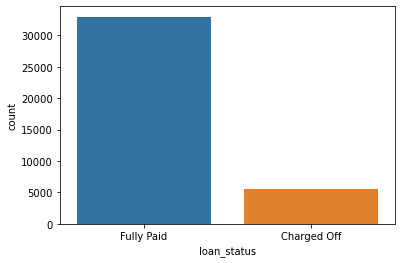

In [37]:
sns.countplot(x = 'loan_status', data = loan)

# Analyzing Home ownership

In [39]:
# Lets review some data on home ownership basis 
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [42]:
loan = loan[loan.home_ownership != "NONE"]

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

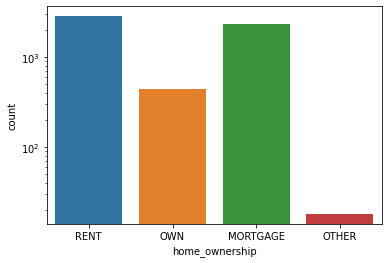

In [41]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

# Analyzing purpose - Univariate Analysis

<AxesSubplot:xlabel='count', ylabel='purpose'>

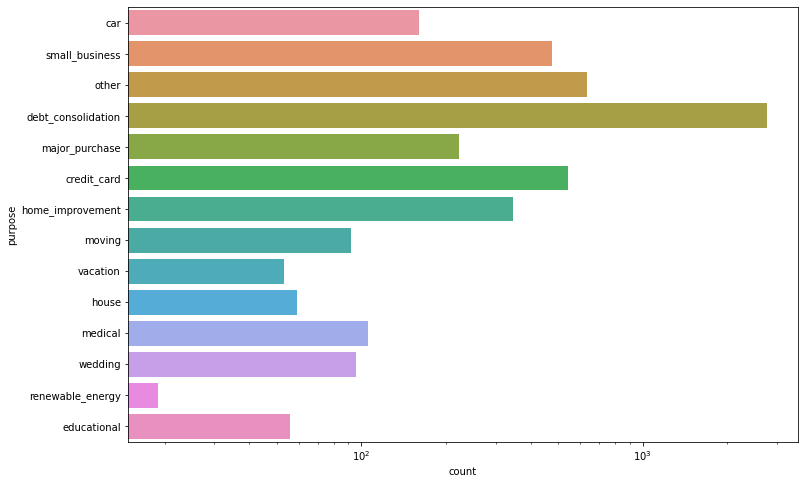

In [43]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

# Analyzing Annual Income groups

In [74]:
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=10,precision =0,labels =['0k-5k','6k-10k','11k-15k','16k-20k','21k-40k','41k-60k','61k-80k','81k-100k','100k-120k','121k-140k'])

<AxesSubplot:xlabel='count', ylabel='annual_inc_groups'>

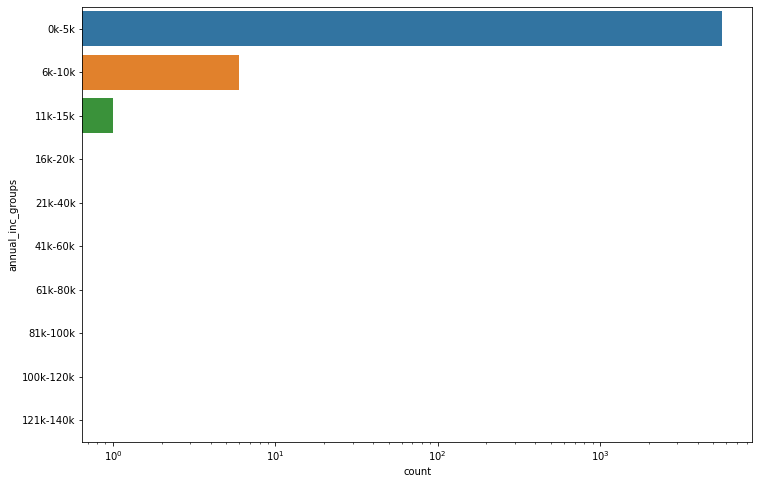

In [80]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])

# Observation
Higher number of loan defaults are for the income range 0K to 5K

<AxesSubplot:xlabel='count', ylabel='term'>

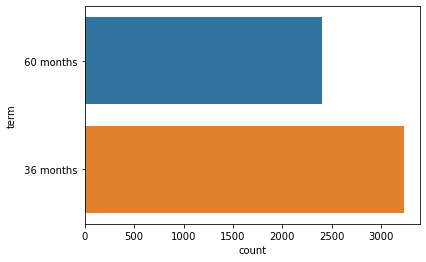

In [81]:
sns.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

# Observation
We can see that higher defaults are happening When Loan term is shorter in this case we can see that more defaulters are for 36 months loan term.

<AxesSubplot:xlabel='verification_status', ylabel='count'>

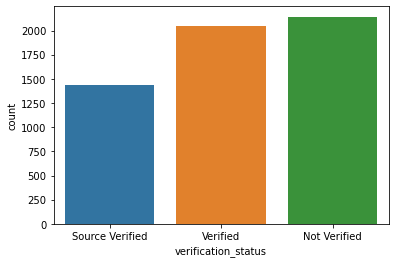

In [55]:
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])

# Observation
We can see that higher defaults are happening in the case when verification status is not verified or in other words we can say when applicant status is not verfied.

# Analyzing by issued month and year


In [56]:
## Extracting month and year
df_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=df_month_year[0]                       
loan['issue_year']='20' + df_month_year[2]

In [58]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,out_prncp,out_prncp_inv,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,issue_month,issue_year
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,0.0,0.0,5833.84,Jan-15,171.62,NaN,May-16,0.0,Dec,2011
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,0.0,0.0,1008.71,Apr-13,119.66,NaN,Sep-13,0.0,Dec,2011
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,0.0,0.0,3005.67,Jun-14,649.91,NaN,May-16,0.0,Dec,2011
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,0.0,0.0,12231.89,Jan-15,357.48,NaN,Apr-16,0.0,Dec,2011
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,0.0,0.0,5632.21,Jan-15,161.03,NaN,Jan-16,0.0,Dec,2011


<AxesSubplot:xlabel='issue_year', ylabel='count'>

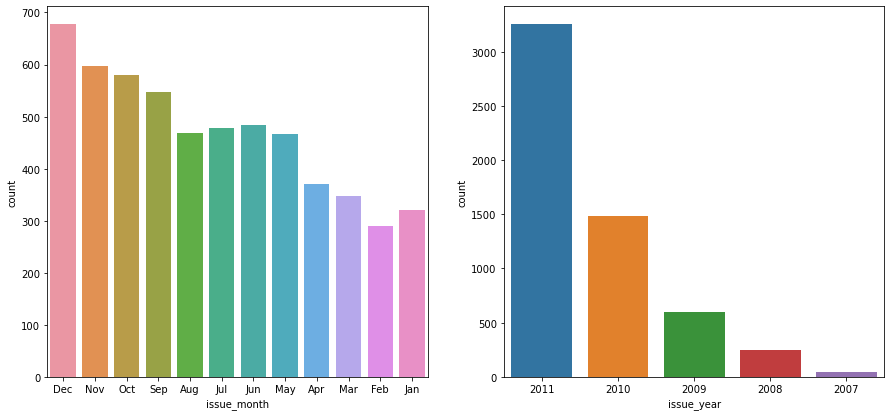

In [59]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])

# With above graphs we can make following observations -
1. Higher defaults are for the month of December when the loan was approved/granted in the month of december.
2. Also we can see one observation in second graph that year 2011 is showing highest number of defaults.


# Now Analyzing Loan Amount


In [61]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

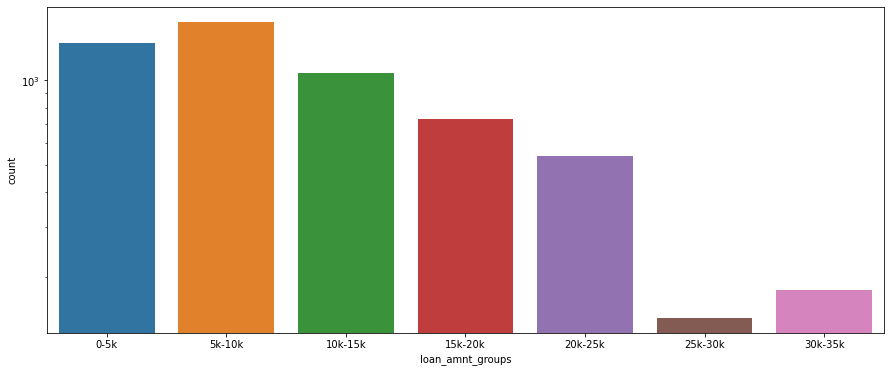

In [62]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

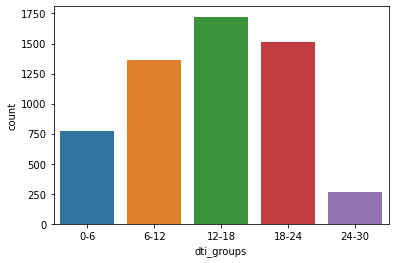

In [63]:
sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

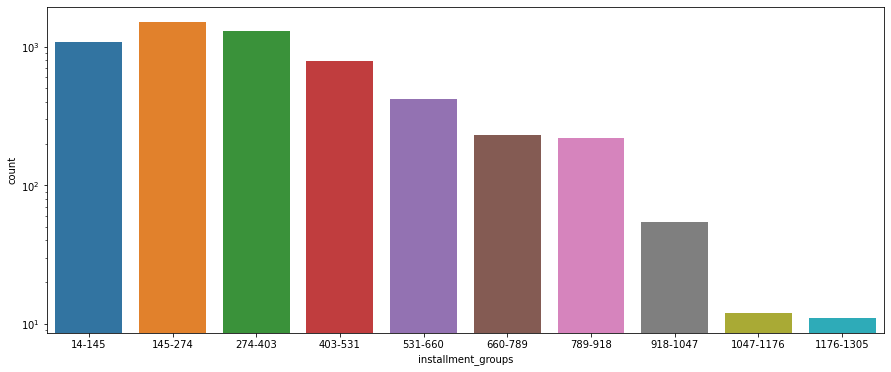

In [64]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])

### Following Observations we can make with above graphs -
1. Highest chances of defaulting is when loan amount is between 5K to 10K.
2. Highest chances of defaulting is when loan installments are between 145K to 274K.
3. When Debt to income ratio is between 12 to 18; chances of defaulting is higher.
